#Case Study: Using AI to Improve Demand Forecasting in Retail

**Introduction:**

In this case study, Master's students in Applied Economics will analyze how AI techniques can be applied to enhance demand forecasting for a retail company. Demand forecasting is crucial for optimizing inventory levels, reducing waste and improving profitability. The students will use machine learning models to forecast demand based on stores, historical sales, temperature in the region, fuel price and economic indicators.

**Problem Identification**

The retail company is facing challenges in accurately predicting product demand, leading to overstocking of some items and understocking of others. This results in:

- High inventory costs due to overstocking.
- Lost sales due to understocking, as popular products are often out of stock.
- Increased waste from unsold perishables.
The goal is to develop a more accurate demand forecasting model using AI techniques to:

- Reduce inventory costs.
- Maximize sales potential.
- Minimize waste.

**Problem Identification Techniques**

To identify the exact problem, the following techniques can be used:

- SWOT Analysis: Assess the company’s current forecasting strengths and weaknesses, the opportunities in improving forecasting accuracy, and threats from competitors who are adopting AI.

- Root Cause Analysis (Fishbone Diagram): Investigate different factors affecting demand forecasting (pricing, promotions, seasonality, customer behavior, economic factors, etc.) and identify which are most challenging to predict.

- Time-Series Analysis: Analyze historical sales data to observe patterns, trends, seasonality, and irregularities.

# Data Preparation

**Uploading datasets into Google Colab Drive.**
- Dataset name.: Walmart Condensed Sales Data
- Source.: https://www.kaggle.com/datasets/souravprakashai/walmart-condensed-sales-data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving walmart.csv to walmart (1).csv


**Importing the Libraries**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

**Loading the Dataset**

In [ ]:
# loading the dataset
df = pd.read_csv('/content/walmart.csv')  # Make sure the path matches your file's name
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


**Preprocessing the data:**

- Missing Data Handling: Use interpolation or imputation techniques to fill gaps in data.
- Feature Engineering: Create new features such as “days to promotion” or “lagged sales” to better capture demand patterns.
- Normalization: Standardize the data to make it compatible with machine learning models.

In [ ]:
#Removing missing values.
df = df.dropna()

# Feature engineering: create a new feature that represents the lagged sales (sales from the previous week)
df['Lagged_Sales'] = df['Weekly_Sales'].shift(1).bfill()

# Convert 'Date' to datetime and extract numerical features
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Extract day, month, and year as separate numerical features
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month

# Normalize the numerical columns
scaler = StandardScaler()
df[['Fuel_Price', 'CPI', 'Lagged_Sales', 'Temperature', 'Unemployment']] = scaler.fit_transform(df[['Fuel_Price', 'CPI', 'Lagged_Sales', 'Temperature', 'Unemployment']])

# Include the new features
X = df[['Store', 'Day', 'Month','Fuel_Price', 'CPI', 'Lagged_Sales', 'Temperature', 'Unemployment', 'Holiday_Flag']]  # Features

# Identify the target
y = df['Weekly_Sales']  # Target (Weekly_Sales)

print(df.head())  # Check the preprocessed data

   Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-02-05    1643690.90             0    -0.995136   -1.713800   
1      1 2010-02-12    1641957.44             1    -1.201170   -1.766089   
2      1 2010-02-19    1611968.17             0    -1.124178   -1.840166   
3      1 2010-02-26    1409727.59             0    -0.760907   -1.737766   
4      1 2010-03-05    1554806.68             0    -0.767955   -1.598328   

        CPI  Unemployment  Lagged_Sales  Day  Month  
0  1.004175      0.056964      1.057106    5      2  
1  1.007880      0.056964      1.057106   12      2  
2  1.009074      0.056964      1.054034   19      2  
3  1.009849      0.056964      1.000896   26      2  
4  1.010624      0.056964      0.642542    5      3  


**Splitting the dataset into Train and Test sets**

In [ ]:
# Define the split index based on the date, for example, 80% of the data will be training data
train_size = int(0.8 * len(df))

# Split data into training and test sets (train on first 80%, test on last 20%)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Split the dataset into training and testing sets (train and test sets defined randomly)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Define the split index based on the date, for example, 80% of the data will be training data
train_size = int(0.8 * len(df))

# Split data into training and test sets (train on first 80%, test on last 20%)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print("Split based on the first 80% of the data:")
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")
print("\nFirst few rows of X_train:")
print(X_train.head())
print("\nFirst few rows of y_train:")
print(y_train.head())

# Split the dataset into training and testing sets (train and test sets defined randomly)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nRandom split (80% training, 20% testing):")
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")
print("\nFirst few rows of X_train after random split:")
print(X_train.head())
print("\nFirst few rows of y_train after random split:")
print(y_train.head())

Split based on the first 80% of the data:
X_train shape: (5148, 9), X_test shape: (1287, 9)
y_train shape: (5148,), y_test shape: (1287,)

First few rows of X_train:
   Store  Day  Month  Fuel_Price       CPI  Lagged_Sales  Temperature  \
0      1    5      2   -1.713800  1.004175      1.057106    -0.995136   
1      1   12      2   -1.766089  1.007880      1.057106    -1.201170   
2      1   19      2   -1.840166  1.009074      1.054034    -1.124178   
3      1   26      2   -1.737766  1.009849      1.000896    -0.760907   
4      1    5      3   -1.598328  1.010624      0.642542    -0.767955   

   Unemployment  Holiday_Flag  
0      0.056964             0  
1      0.056964             1  
2      0.056964             0  
3      0.056964             0  
4      0.056964             0  

First few rows of y_train:
0    1643690.90
1    1641957.44
2    1611968.17
3    1409727.59
4    1554806.68
Name: Weekly_Sales, dtype: float64

Random split (80% training, 20% testing):
X_train shape: (5

# Modeling

**Apply different techniques to build the demand forecasting model:**

- Linear Regression (Baseline Model): This simple model will be used as a baseline to measure the improvement made by more advanced techniques. It predicts demand based on historical sales and price.

- Ridge Regression: A version of linear regression that adds a penalty to prevent the model from becoming too complex, making it more robust and better at handling real-world data.

- Random Forest Regressor: A robust tree-based model that handles non-linear relationships and can capture the importance of different features (e.g., promotions, seasonality).

- XGBRegressor: It is a method to predict continuous values by combining lots of decision trees in a way that gets progressively more accurate over time. It is widely used in fields like finance, marketing, and economics where accurate numerical predictions are important.

**Linear Regression**

In [ ]:
# Apply Linear Regressor
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
# Make predictions
linear_pred = linear_model.predict(X_test)

In [ ]:
# Apply Linear Regressor
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Print the model's coefficients and intercept
print("Linear Regression Model Coefficients:")
print(linear_model.coef_)
print("\nIntercept:")
print(linear_model.intercept_)

# Make predictions
linear_pred = linear_model.predict(X_test)

# Print the first few predictions alongside the actual values
print("\nFirst 5 Predictions vs Actual Values:")
for pred, actual in zip(linear_pred[:5], y_test[:5]):
    print(f"Predicted: {pred:.2f}, Actual: {actual}")


Linear Regression Model Coefficients:
[-1.05975145e+03 -2.53427230e+03  8.24216283e+02 -2.01515421e+03
 -8.93279748e+03  5.29336349e+05 -3.84561978e+02 -4.27226333e+03
 -4.77179213e+04]

Intercept:
1110080.3947919537

First 5 Predictions vs Actual Values:
Predicted: 1196576.00, Actual: 1138800.32
Predicted: 1289996.47, Actual: 1304850.67
Predicted: 1774664.51, Actual: 1769296.25
Predicted: 1017559.49, Actual: 1077640.13
Predicted: 451100.21, Actual: 428851.99


**Ridge Regression**

In [ ]:
# Regularization: Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
# Make predictions
ridge_pred = ridge_model.predict(X_test)


In [ ]:
# Regularization: Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Print the model's coefficients and intercept
print("Ridge Regression Model Coefficients:")
print(ridge_model.coef_)
print("\nIntercept:")
print(ridge_model.intercept_)

# Make predictions
ridge_pred = ridge_model.predict(X_test)

# Print the first few predictions alongside the actual values
print("\nFirst 5 Predictions vs Actual Values:")
for pred, actual in zip(ridge_pred[:5], y_test[:5]):
    print(f"Predicted: {pred:.2f}, Actual: {actual}")

Ridge Regression Model Coefficients:
[-1.06297521e+03 -2.53427835e+03  8.25571032e+02 -2.01179769e+03
 -8.94993441e+03  5.29213337e+05 -3.83786691e+02 -4.28076687e+03
 -4.75398237e+04]

Intercept:
1110133.6877139988

First 5 Predictions vs Actual Values:
Predicted: 1196553.40, Actual: 1138800.32
Predicted: 1289940.44, Actual: 1304850.67
Predicted: 1774535.99, Actual: 1769296.25
Predicted: 1017574.26, Actual: 1077640.13
Predicted: 451149.32, Actual: 428851.99


**Random Forest Regressor**

In [ ]:
# Apply Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
# Make predictions
random_forest_pred = model.predict(X_test)

In [ ]:
# Apply Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Print feature importances
print("Feature Importances from Random Forest Regressor:")
print(model.feature_importances_)

# Make predictions
random_forest_pred = model.predict(X_test)

# Print the first few predictions alongside the actual values
print("\nFirst 5 Predictions vs Actual Values:")
for pred, actual in zip(random_forest_pred[:5], y_test[:5]):
    print(f"Predicted: {pred:.2f}, Actual: {actual}")

Feature Importances from Random Forest Regressor:
[0.00806281 0.02629824 0.01253096 0.00666758 0.00582915 0.92313204
 0.0091195  0.00467536 0.00368436]

First 5 Predictions vs Actual Values:
Predicted: 1121399.89, Actual: 1138800.32
Predicted: 1339688.09, Actual: 1304850.67
Predicted: 1822721.24, Actual: 1769296.25
Predicted: 1004076.65, Actual: 1077640.13
Predicted: 450295.26, Actual: 428851.99


**XGBoost Regressor**

In [ ]:
xgbr = XGBRegressor(n_estimators = 200)
xgbr.fit(X_train, y_train)
# Make predictions
xgb_pred = xgbr.predict(X_test)

In [ ]:
# Apply XGBoost Regressor
xgbr = XGBRegressor(n_estimators=200)
xgbr.fit(X_train, y_train)

# Print the feature importances
print("Feature Importances from XGBoost Regressor:")
print(xgbr.feature_importances_)

# Make predictions
xgb_pred = xgbr.predict(X_test)

# Print the first few predictions alongside the actual values
print("\nFirst 5 Predictions vs Actual Values:")
for pred, actual in zip(xgb_pred[:5], y_test[:5]):
    print(f"Predicted: {pred:.2f}, Actual: {actual}")

Feature Importances from XGBoost Regressor:
[0.01245738 0.03585507 0.04246207 0.00698026 0.01008886 0.83736753
 0.00904692 0.01001641 0.03572551]

First 5 Predictions vs Actual Values:
Predicted: 1137447.25, Actual: 1138800.32
Predicted: 1363147.38, Actual: 1304850.67
Predicted: 1913574.75, Actual: 1769296.25
Predicted: 1023491.62, Actual: 1077640.13
Predicted: 437714.88, Actual: 428851.99


# Evaluating the models

**Evaluate the Model with Standard Indicators:**

- Mean Absolute Error (MAE): Measures the average absolute difference between actual and predicted sales.
- Mean Squared Error (MSE): Measures the average squared difference between the predicted values and the actual values.
- r2_score: Measures the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

**Linear Regression**

In [ ]:
mae = mean_absolute_error(y_test, linear_pred)
mse = mean_squared_error(y_test, linear_pred)
r2 = r2_score(y_test, linear_pred)
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 91092.42535551863
Mean Squared Error (MSE): 31157388896.294106
R-squared (R2): 0.9032843475872588


**Ridge Regression**

In [ ]:
mae = mean_absolute_error(y_test, ridge_pred)
mse = mean_squared_error(y_test, ridge_pred)
r2 = r2_score(y_test, ridge_pred)
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 91121.3560091893
Mean Squared Error (MSE): 31157904080.076656
R-squared (R2): 0.9032827484052539


**Random Forest**

In [ ]:
mae = mean_absolute_error(y_test, random_forest_pred)
mse = mean_squared_error(y_test, random_forest_pred)
r2 = r2_score(y_test, random_forest_pred)
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 59361.50848368299
Mean Squared Error (MSE): 9777613398.672585
R-squared (R2): 0.9696493097659844


**XGBoost Regressor**

In [ ]:
mae = mean_absolute_error(y_test, xgb_pred)
mse = mean_squared_error(y_test, xgb_pred)
r2 = r2_score(y_test, xgb_pred)
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 49728.32306915308
Mean Squared Error (MSE): 6114866527.275938
R-squared (R2): 0.9810188425104946


**Visualize how close the best model's predicted sales are to the real sales for the first 100 rows.**

Create a DataFrame and display the first 100 rows.

In [ ]:
# Create a DataFrame to compare actual and predicted sales
comparison_df = pd.DataFrame({
    'Index': X_test[:100].index.sort_values(),
    'Actual Sales': y_test[:100],
    'Predicted Sales': xgb_pred[:100]
})
# Format the values to two decimal places for better readability
formatted_df = comparison_df.style.format({'Actual Sales': '{:,.2f}', 'Predicted Sales': '{:,.2f}'})

# Display the formatted table
formatted_df

,Index,Actual Sales,Predicted Sales
2436,23,"1,138,800.32","1,137,447.25"
3361,31,"1,304,850.67","1,363,147.38"
233,80,"1,769,296.25","1,913,574.75"
3667,96,"1,077,640.13","1,023,491.62"
5011,156,"428,851.99","437,714.88"
4850,198,"1,004,523.59","963,022.12"
3891,208,"1,523,410.71","1,411,282.25"
1699,230,"1,014,898.78","1,052,174.50"
2742,233,"1,955,896.59","1,963,860.50"
1703,263,"958,667.23","981,820.31"


Plotting both actual and predicted sales on a line chart. Blue represents actual sales, and red (dashed) represents the predicted sales.

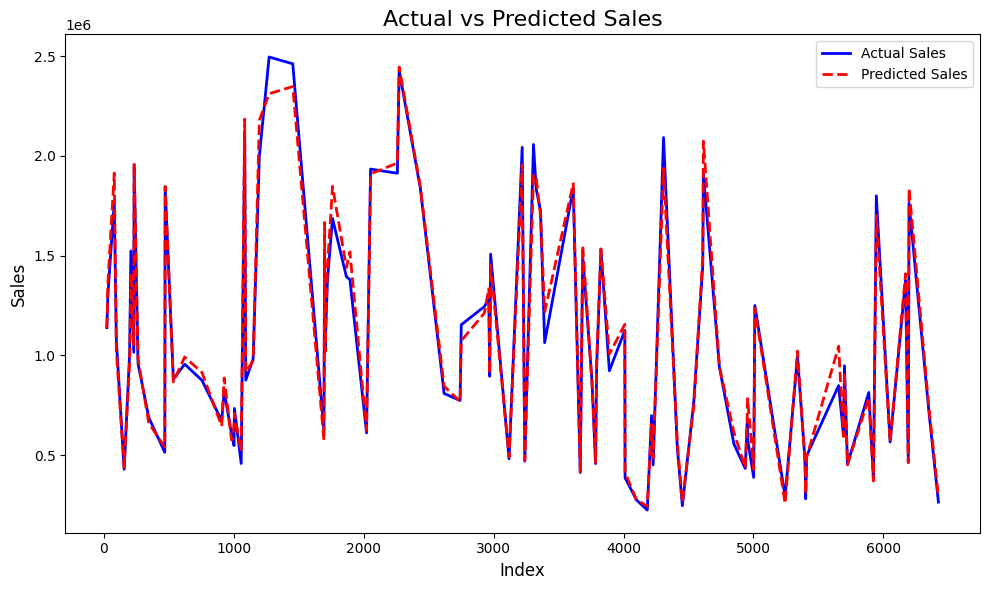

In [ ]:
# Set the index for easy plotting
comparison_df.set_index('Index', inplace=True)

# Plot the actual and predicted sales
plt.figure(figsize=(10, 6))
plt.plot(comparison_df.index, comparison_df['Actual Sales'], label='Actual Sales', color='blue', linewidth=2)
plt.plot(comparison_df.index, comparison_df['Predicted Sales'], label='Predicted Sales', color='red', linestyle='--', linewidth=2)

# Add title and labels
plt.title('Actual vs Predicted Sales', fontsize=16)
plt.xlabel('Index', fontsize=12)
plt.ylabel('Sales', fontsize=12)

# Add a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

# Forecasting

Forecast sales for each store over the next 4 weeks and updates the sales predictions week by week, using the predicted sales from the previous week as input for the next. The goal is to help store managers see what sales might look like in the future.

Find the last week's records for each store from the Walmart dataset.

In [ ]:
# Ensure 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Identify the last week (i.e., latest date) of data for each store
last_week_per_store = df.groupby('Store')['Date'].max().reset_index()

# Merge the last week information back to the original DataFrame to filter the last week's records for each store
last_week_df = pd.merge(df, last_week_per_store, on=['Store', 'Date'], how='inner')

# Display the result
print(last_week_df)

    Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0       1 2012-10-26    1493659.74             0     0.460662    0.321129   
1       2 2012-10-26    1834458.35             0     0.494820    0.321129   
2       3 2012-10-26     405432.70             0     0.758870    0.321129   
3       4 2012-10-26    2149594.46             0     0.161369    0.338559   
4       5 2012-10-26     319550.77             0     0.598380    0.321129   
5       6 2012-10-26    1431426.34             0     0.633080    0.321129   
6       7 2012-10-26     495543.28             0    -0.983207    0.713300   
7       8 2012-10-26     891671.44             0     0.221011    0.321129   
8       9 2012-10-26     549731.49             0     0.480181    0.321129   
9      10 2012-10-26    1744349.05             0     0.533316    2.053216   
10     11 2012-10-26    1200729.45             0     0.737182    0.321129   
11     12 2012-10-26     974697.60             0     0.286617    2.053216   

The function predict_next_weeks_with_continuous_dates takes a DataFrame df, a prediction model, and the number of weeks to make the sales prediction for each store over the next 4 weeks.The Predicted Sales column is formatted to make the numbers easier to read by adding commas and rounding to 2 decimal places. Finally, it prints the first 50 rows of the predicted data.

In [ ]:
from datetime import timedelta

# Ensure 'Date' column is in datetime format before performing operations
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Check if any NaT values were introduced (if any date parsing failed)
if df['Date'].isnull().sum() > 0:
    print("Warning: Some dates could not be parsed and have been set to NaT. Check your data!")

# Function to predict for the next 4 weeks for 45 stores without modifying the original df
def predict_next_weeks_with_continuous_dates(df, model, n_weeks=4):
    df_copy = df.copy()  # Create a copy of df for prediction to prevent data modification
    predictions = []  # List to store predictions for all stores over 4 weeks

    for week in range(n_weeks):
        weekly_predictions = []

        for store in df_copy['Store'].unique():
            # Filter data for the current store
            store_data = df_copy[df_copy['Store'] == store]

            # Prepare input features
            X = store_data[['Store', 'Day', 'Month', 'Fuel_Price', 'CPI', 'Lagged_Sales', 'Temperature', 'Unemployment', 'Holiday_Flag']]

            # Make the prediction for the current store
            prediction = model.predict(X)[0]

            # Store the date for the current store
            current_date = pd.to_datetime(df_copy.loc[df_copy['Store'] == store, 'Date'].values[0])

            weekly_predictions.append({
                'Store': store,
                'Date': current_date + timedelta(days=7),  # Add 7 days for each subsequent week
                'Predicted Sales': prediction
            })

            # Update Lagged_Sales in df_copy for the next prediction round
            df_copy.loc[df_copy['Store'] == store, 'Lagged_Sales'] = prediction

            # Update the day and month for the next week based on updated Date
            df_copy.loc[df_copy['Store'] == store, 'Date'] += timedelta(days=7)
            df_copy.loc[df_copy['Store'] == store, 'Day'] = df_copy['Date'].dt.day
            df_copy.loc[df_copy['Store'] == store, 'Month'] = df_copy['Date'].dt.month

        # Append the week's predictions to the main list
        predictions.extend(weekly_predictions)

    return pd.DataFrame(predictions)

# Call the function to predict for the next 4 weeks for all 45 stores
predictions_df = predict_next_weeks_with_continuous_dates(last_week_df, xgbr, n_weeks=4)

# Format 'Predicted Sales' for better readability
predictions_df['Predicted Sales'] = predictions_df['Predicted Sales'].apply(lambda x: f"{x:,.2f}")

# Display the final prediction DataFrame
print(predictions_df.head(50))


    Store       Date Predicted Sales
0       1 2012-11-02    1,486,412.00
1       2 2012-11-02    1,840,727.00
2       3 2012-11-02      404,150.19
3       4 2012-11-02    2,146,753.25
4       5 2012-11-02      323,465.44
5       6 2012-11-02    1,440,440.50
6       7 2012-11-02      500,440.56
7       8 2012-11-02      892,629.62
8       9 2012-11-02      550,853.62
9      10 2012-11-02    1,749,719.38
10     11 2012-11-02    1,198,185.75
11     12 2012-11-02    1,001,776.44
12     13 2012-11-02    2,082,697.62
13     14 2012-11-02    1,672,789.88
14     15 2012-11-02      547,706.31
15     16 2012-11-02      554,692.50
16     17 2012-11-02      961,743.75
17     18 2012-11-02    1,126,975.75
18     19 2012-11-02    1,354,787.88
19     20 2012-11-02    2,037,333.50
20     21 2012-11-02      620,756.44
21     22 2012-11-02    1,066,776.38
22     23 2012-11-02    1,351,553.00
23     24 2012-11-02    1,296,735.62
24     25 2012-11-02      714,475.00
25     26 2012-11-02      983,379.62
2

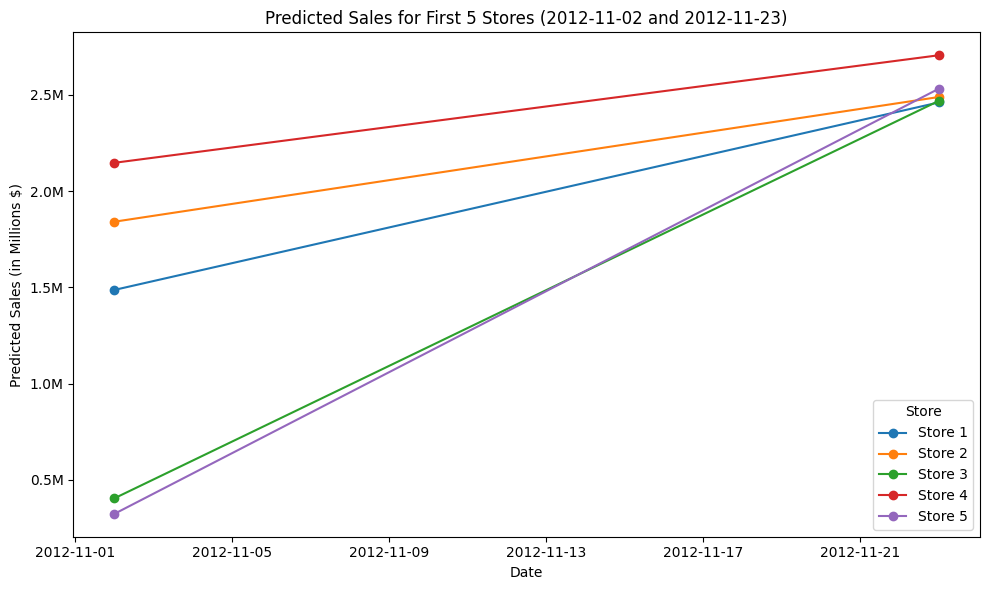

In [ ]:
# Convert 'Predicted Sales' to a numeric format, removing commas
predictions_df['Predicted Sales'] = predictions_df['Predicted Sales'].replace({',': ''}, regex=True).astype(float)
# Convert the date strings to datetime objects first
target_dates = pd.to_datetime(['2012-11-02', '2012-11-23'])


# Filter data to include only the first 5 stores
df_first_5 = predictions_df[
    (predictions_df['Store'] <= 5) &
    (predictions_df['Date'].isin(target_dates))
][['Store', 'Date', 'Predicted Sales']]

# Plotting
plt.figure(figsize=(10, 6))

# Plot each store's predictions as a line
for store in df_first_5['Store'].unique():
    # Filter data for the current store
    store_data = df_first_5[df_first_5['Store'] == store]

    # Plot with date on x-axis and sales on y-axis
    plt.plot(store_data['Date'], store_data['Predicted Sales'] / 1e6, label=f'Store {store}', marker='o')

# Add labels and title
plt.title('Predicted Sales for First 5 Stores (2012-11-02 and 2012-11-23)')
plt.xlabel('Date')
plt.ylabel('Predicted Sales (in Millions $)')

# Format the y-axis to show commas and adjust to millions
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.1f}M'))

# Display legend and plot
plt.legend(title='Store')
plt.tight_layout()
plt.show()

In [ ]:
from datetime import timedelta

# Ensure 'Date' column is in datetime format before performing operations
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Check if any NaT values were introduced (if any date parsing failed)
if df['Date'].isnull().sum() > 0:
    print("Warning: Some dates could not be parsed and have been set to NaT. Check your data!")

# Function to predict for the next 4 weeks for 45 stores without modifying the original df
def predict_next_weeks_with_continuous_dates(df, model, n_weeks=4):
    df_copy = df.copy()  # Create a copy of df for prediction to prevent data modification
    predictions = []  # List to store predictions for all stores over 4 weeks

    for week in range(n_weeks):
        weekly_predictions = []

        for store in df_copy['Store'].unique():
            # Filter data for the current store
            store_data = df_copy[df_copy['Store'] == store]

            # Prepare input features
            X = store_data[['Store', 'Day', 'Month', 'Fuel_Price', 'CPI', 'Lagged_Sales', 'Temperature', 'Unemployment', 'Holiday_Flag']]

            # Make the prediction for the current store
            prediction = model.predict(X)[0]

            # Store the date for the current store
            current_date = pd.to_datetime(df_copy.loc[df_copy['Store'] == store, 'Date'].values[0])

            weekly_predictions.append({
                'Store': store,
                'Date': current_date + timedelta(days=7),  # Add 7 days for each subsequent week
                'Predicted Sales': prediction
            })

            # Update Lagged_Sales in df_copy for the next prediction round
            df_copy.loc[df_copy['Store'] == store, 'Lagged_Sales'] = prediction

            # Update the day and month for the next week based on updated Date
            df_copy.loc[df_copy['Store'] == store, 'Date'] += timedelta(days=7)
            df_copy.loc[df_copy['Store'] == store, 'Day'] = df_copy['Date'].dt.day
            df_copy.loc[df_copy['Store'] == store, 'Month'] = df_copy['Date'].dt.month

        # Append the week's predictions to the main list
        predictions.extend(weekly_predictions)

    return pd.DataFrame(predictions)

# Call the function to predict for the next 12 weeks for all 45 stores
predictions_df = predict_next_weeks_with_continuous_dates(last_week_df, xgbr, n_weeks=12) #Changed the number of Weeks from 4 to 12)

# Format 'Predicted Sales' for better readability
predictions_df['Predicted Sales'] = predictions_df['Predicted Sales'].apply(lambda x: f"{x:,.2f}")

# Display the final prediction DataFrame
print(predictions_df.head(540))


     Store       Date Predicted Sales
0        1 2012-11-02    1,486,412.00
1        2 2012-11-02    1,840,727.00
2        3 2012-11-02      404,150.19
3        4 2012-11-02    2,146,753.25
4        5 2012-11-02      323,465.44
..     ...        ...             ...
535     41 2013-01-18    2,060,009.88
536     42 2013-01-18    2,111,759.75
537     43 2013-01-18    1,910,713.75
538     44 2013-01-18    2,069,616.88
539     45 2013-01-18    2,011,824.00

[540 rows x 3 columns]


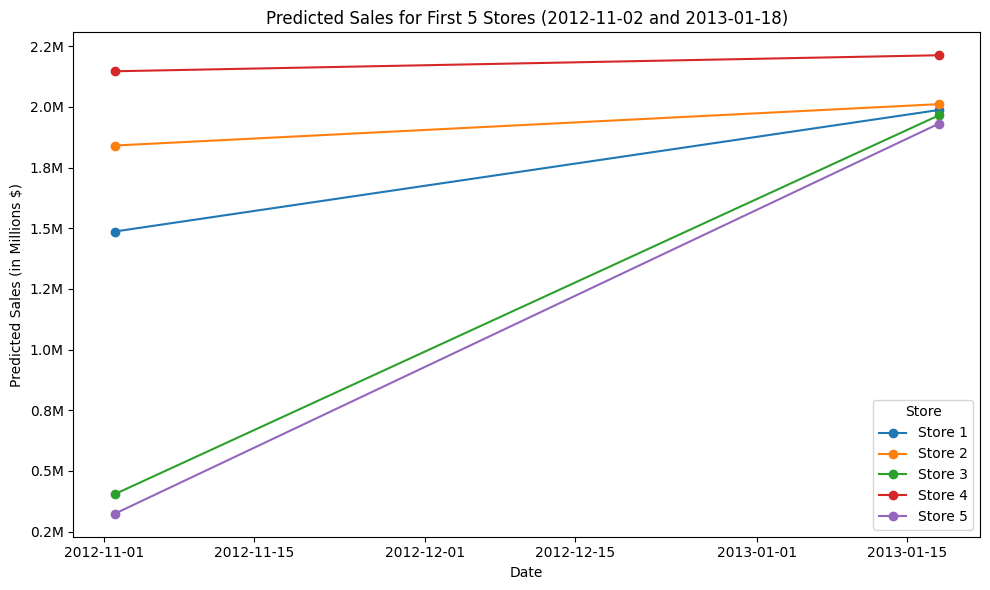

In [ ]:
# Convert 'Predicted Sales' to a numeric format, removing commas
predictions_df['Predicted Sales'] = predictions_df['Predicted Sales'].replace({',': ''}, regex=True).astype(float)
# Convert the date strings to datetime objects first
target_dates = pd.to_datetime(['2012-11-02', '2013-01-18']) # Changed from 2012-23-11 to 2013-01-18


# Filter data to include only the first 5 stores
df_first_5 = predictions_df[
    (predictions_df['Store'] <= 5) &
    (predictions_df['Date'].isin(target_dates))
][['Store', 'Date', 'Predicted Sales']]

# Plotting
plt.figure(figsize=(10, 6))

# Plot each store's predictions as a line
for store in df_first_5['Store'].unique():
    # Filter data for the current store
    store_data = df_first_5[df_first_5['Store'] == store]

    # Plot with date on x-axis and sales on y-axis
    plt.plot(store_data['Date'], store_data['Predicted Sales'] / 1e6, label=f'Store {store}', marker='o')

# Add labels and title
plt.title('Predicted Sales for First 5 Stores (2012-11-02 and 2013-01-18)')
plt.xlabel('Date')
plt.ylabel('Predicted Sales (in Millions $)')

# Format the y-axis to show commas and adjust to millions
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.1f}M'))

# Display legend and plot
plt.legend(title='Store')
plt.tight_layout()
plt.show()